# Example of K-means clustering using Old Faithful geyser data

This notebook example is adapted from [Dr. Elizabeth A. Barnes's Objective Analysis for the Atmospheric Sciences (Colorado State University)](https://github.com/eabarnes1010/course_objective_analysis/tree/main).

Here we show an example of running k-means clustering analysis applied to Old Faithful geyser eruptions. We will use [the clustering package from SciPy](https://docs.scipy.org/doc/scipy/reference/cluster.vq.html).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans,vq
import matplotlib.cm as cm
import matplotlib as mpl
import pandas as pd

linewidth_default = 2.0
fig_text_default = 18.
fig_title_default = fig_text_default*1.5

plt.rc('lines', linewidth=linewidth_default)
plt.rc('text', usetex=False)
plt.rc('font', size=fig_text_default, weight='normal',family='sans-serif')
plt.rc('axes',titlesize=fig_title_default,titleweight='bold')
mpl.rcParams['figure.dpi'] = 100

### Get the data
This data comes from:
https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat

It consists of a list of 272 geyser eruptions, each with two quantitative features: eruption duration (minutes) and delay between eruptions (minutes).

In [7]:
filename = "https://raw.githubusercontent.com/eabarnes1010/course_objective_analysis/main/data/old_faithful_eruptions.csv"
data = pd.read_csv(filename)
print(data.head())
data = data.values[:,1:] # duration and delay 

   index  duration  delay
0      1     3.600     79
1      2     1.800     54
2      3     3.333     74
3      4     2.283     62
4      5     4.533     85


Now plot the data.

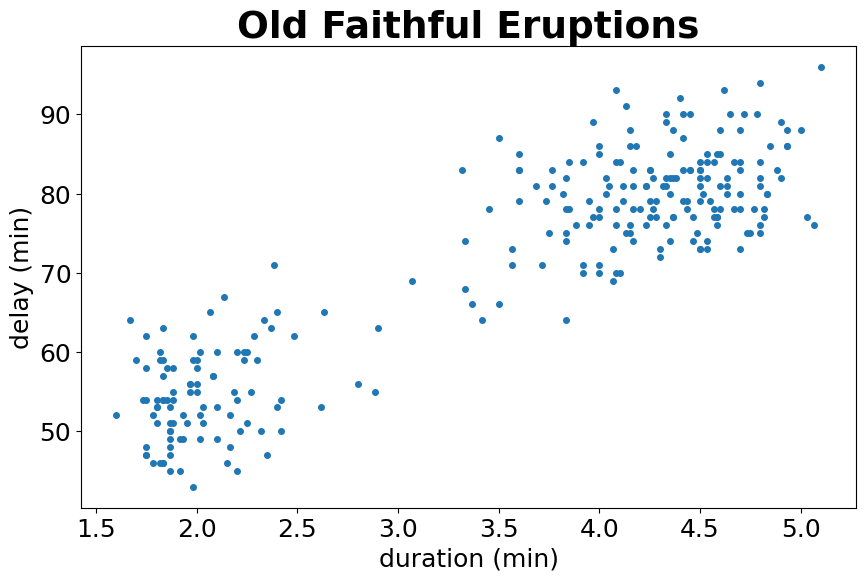

In [8]:
plt.figure(figsize=(10,6))
plt.plot(data[:,0],data[:,1],'.',markersize = 8)
plt.xlabel("duration (min)")
plt.ylabel("delay (min)")

plt.title('Old Faithful Eruptions')
plt.show()

### Perform k-means clustering with k=5 and k=2

Note that most of the code below is just to plot the results. The "magic" happens in two lines:

`clusters, dist = kmeans(data, k, iter)`

`classes, _ = vq(data,clusters)`

The first line outputs the clusters (or nodes, centroids; *matrix*) and the sum distance (also called quantization error; *integer*), and uses as input the dataset, the chosen number of clusters, and the number of iterations you want. The iterations represent the number of times the algorithm resets the initial random placement of the clusters (or centroids) and restarts the unsupervised learning. The output is the set of centroids from all of these iterations that has the minimum sum squared distances. 

The second line outputs the assigned cluster for each day (*vector*).

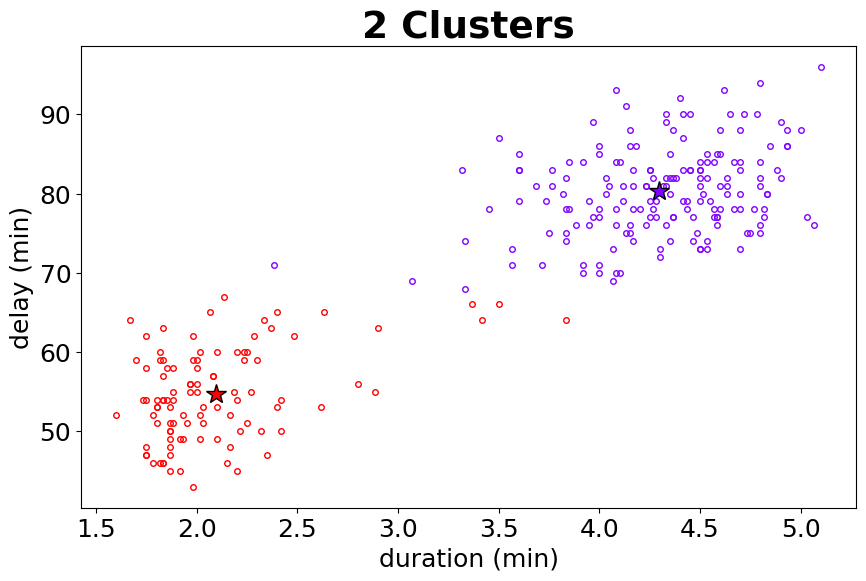

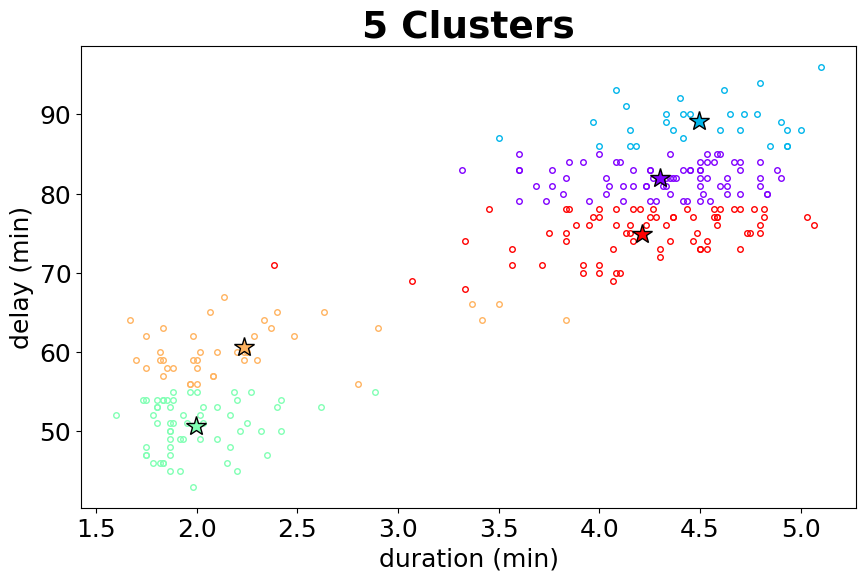

In [9]:
for NUM_CLUSTERS in [2,5]:

    #--------- kmeans-------------------------
    centroids, _ = kmeans(data, NUM_CLUSTERS, iter=20)
    idx, _ = vq(data,centroids)
    #-----------------------------------------------

    COLOR_MAT = cm.rainbow(np.linspace(0, 1, NUM_CLUSTERS))

    plt.figure(figsize=(10,6))
    plt.title(str(NUM_CLUSTERS) + ' Clusters')

    for (ind,val) in enumerate(data):
        plt.plot(val[0],val[1],'.',color = COLOR_MAT[idx[ind]], markersize = 8, markerfacecolor = 'none')

    for (ind,val) in enumerate(centroids):
        plt.plot(val[0],val[1],'*',color = COLOR_MAT[ind],markersize = 15,markeredgecolor = 'black')

    plt.xlabel("duration (min)")
    plt.ylabel("delay (min)")
    plt.show()

The figures above show the resulting final clusters using k=5 and k=2. As in other examples, the stars denote the final cluster centers and the data points are colored according to which cluster/center they are assigned to. Note that both give answers that *could* be reasonable, and it is up to me as a scientist to decide which is useful/physical/meaningful.